<a href="https://colab.research.google.com/github/oerv13/Ibero/blob/main/Clase_Ciencia_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpieza y preparacion de los datos

Importar las libreias a usar


In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

1. Cargar los datos (Dataset)

In [2]:
# Agregar Disco Google Drive

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [9]:
# Crear variable df con el dataset, tener en cuenta no usar encabezado del dataset

df = pd.read_csv('/content/sample_data/POWER_Point_Hourly_5yearsC.csv', sep = ',', encoding = "ISO-8859-1", skiprows=15)
print(df)


       YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0      2020   1   1   0                0.0  16.11  97.02         2.12  82.31   
1      2020   1   1   1                0.0  16.04  96.61         2.13  82.26   
2      2020   1   1   2                0.0  15.88  96.98         2.16  82.22   
3      2020   1   1   3                0.0  15.62  97.36         1.86  82.22   
4      2020   1   1   4                0.0  15.40  97.65         1.27  82.24   
...     ...  ..  ..  ..                ...    ...    ...          ...    ...   
43867  2025   1   1  19                0.0  17.33  87.88         4.76  82.31   
43868  2025   1   1  20                0.0  16.77  89.14         3.94  82.37   
43869  2025   1   1  21                0.0  16.34  89.32         4.12  82.39   
43870  2025   1   1  22                0.0  16.28  87.29         6.85  82.41   
43871  2025   1   1  23                0.0  16.15  87.59         7.40  82.41   

       WS10M  WD10M  
0       1.43   35

2. Explorar y Diagnosticar


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43872 entries, 0 to 43871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               43872 non-null  int64  
 1   MO                 43872 non-null  int64  
 2   DY                 43872 non-null  int64  
 3   HR                 43872 non-null  int64  
 4   ALLSKY_SFC_SW_DWN  43872 non-null  float64
 5   T2M                43872 non-null  float64
 6   RH2M               43872 non-null  float64
 7   PRECTOTCORR        43872 non-null  float64
 8   PS                 43872 non-null  float64
 9   WS10M              43872 non-null  float64
 10  WD10M              43872 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.7 MB
None


In [11]:
print(df.isnull().sum())

YEAR                 0
MO                   0
DY                   0
HR                   0
ALLSKY_SFC_SW_DWN    0
T2M                  0
RH2M                 0
PRECTOTCORR          0
PS                   0
WS10M                0
WD10M                0
dtype: int64


In [12]:
print(df.describe())

               YEAR            MO            DY            HR  \
count  43872.000000  43872.000000  43872.000000  43872.000000   
mean    2022.001641      6.518053     15.727024     11.500000   
std        1.416355      3.450724      8.806826      6.922265   
min     2020.000000      1.000000      1.000000      0.000000   
25%     2021.000000      4.000000      8.000000      5.750000   
50%     2022.000000      7.000000     16.000000     11.500000   
75%     2023.000000     10.000000     23.000000     17.250000   
max     2025.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN           T2M          RH2M   PRECTOTCORR  \
count       43872.000000  43872.000000  43872.000000  43872.000000   
mean          195.885959     19.045799     78.475345      4.808085   
std           260.551693      3.483269     15.266261      9.519440   
min             0.000000      9.610000     28.970000      0.000000   
25%             0.000000     16.240000     65.170000      0.1000

In [13]:
# Crear nuevo dataframe sin columnas identificadoras
cols_a_evaluar = [col for col in df.columns if col not in ['YEAR','MO','DY','HR']]

df_eda = df[cols_a_evaluar]

print(df_eda)

       ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  WS10M  WD10M
0                    0.0  16.11  97.02         2.12  82.31   1.43   35.9
1                    0.0  16.04  96.61         2.13  82.26   1.29   25.8
2                    0.0  15.88  96.98         2.16  82.22   1.27   17.9
3                    0.0  15.62  97.36         1.86  82.22   1.36   21.1
4                    0.0  15.40  97.65         1.27  82.24   1.45   31.2
...                  ...    ...    ...          ...    ...    ...    ...
43867                0.0  17.33  87.88         4.76  82.31   0.91   22.0
43868                0.0  16.77  89.14         3.94  82.37   1.10   47.6
43869                0.0  16.34  89.32         4.12  82.39   1.15   61.0
43870                0.0  16.28  87.29         6.85  82.41   1.05   64.7
43871                0.0  16.15  87.59         7.40  82.41   1.00   63.9

[43872 rows x 7 columns]


**3. Limpiar nulos y duplicados**

In [ ]:
# En caso de tener valores nulos (null)

# imputer = SimpleImputer(strategy='mean')
# df['NOMBRE_COLUMNA_CON_NULOS'] = imputer.fit_transform(df[['NOMBRE_COLUMNA_CON_NULOS']])

In [14]:
# Eliminar duplicados

df = df.drop_duplicates()


In [11]:
print(df)

       YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0      2020   1   1   0                0.0  16.11  97.02         2.12  82.31   
1      2020   1   1   1                0.0  16.04  96.61         2.13  82.26   
2      2020   1   1   2                0.0  15.88  96.98         2.16  82.22   
3      2020   1   1   3                0.0  15.62  97.36         1.86  82.22   
4      2020   1   1   4                0.0  15.40  97.65         1.27  82.24   
...     ...  ..  ..  ..                ...    ...    ...          ...    ...   
43867  2025   1   1  19                0.0  17.33  87.88         4.76  82.31   
43868  2025   1   1  20                0.0  16.77  89.14         3.94  82.37   
43869  2025   1   1  21                0.0  16.34  89.32         4.12  82.39   
43870  2025   1   1  22                0.0  16.28  87.29         6.85  82.41   
43871  2025   1   1  23                0.0  16.15  87.59         7.40  82.41   

       WS10M  WD10M  
0       1.43   35

**4. Tratar Atipicos**

In [15]:
df_filtrado = df.copy()

filas_iniciales = df.shape[0]
filas_eliminadas_total = 0

for col in cols_a_evaluar:
    Q1 = df_filtrado[col].quantile(0.25)
    Q3 = df_filtrado[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar cuántos outliers hay en esta columna antes de filtrar
    outliers_col = df_filtrado[
        (df_filtrado[col] < limite_inferior) | (df_filtrado[col] > limite_superior)
    ].shape[0]

    print(f"Columna {col}: {outliers_col} outliers detectados")

    # Filtrar filas
    df_filtrado = df_filtrado[
        (df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)
    ]

# Mostrar resumen
print("\nResumen general:")
print("Filas originales:", filas_iniciales)
print("Filas finales sin outliers:", df_filtrado.shape[0])
print("Total filas eliminadas:", filas_iniciales - df_filtrado.shape[0])

porcentaje = (filas_iniciales - df_filtrado.shape[0])*100/filas_iniciales
print(f"Porcentaje filas eliminadas: {porcentaje:.2f}%")

Columna ALLSKY_SFC_SW_DWN: 1 outliers detectados
Columna T2M: 0 outliers detectados
Columna RH2M: 0 outliers detectados
Columna PRECTOTCORR: 4513 outliers detectados
Columna PS: 110 outliers detectados
Columna WS10M: 1457 outliers detectados
Columna WD10M: 4899 outliers detectados

Resumen general:
Filas originales: 43872
Filas finales sin outliers: 32892
Total filas eliminadas: 10980
Porcentaje filas eliminadas: 25.03%


**5. Escalar y Codificar**

In [16]:
# Si tiene variables categóricas

#df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

"""
# Copia del DataFrame original
df_codificado = df.copy()

# Detectar columnas de tipo object o category
cols_categoricas = df_codificado.select_dtypes(include=['object', 'category']).columns.tolist()

if cols_categoricas:
    print(f"Columnas categóricas encontradas: {cols_categoricas}")

    # Codificación One-Hot Encoding (elimina la primera categoría para evitar colinealidad)
    df_codificado = pd.get_dummies(df_codificado, columns=cols_categoricas, drop_first=True)

    print("Codificación aplicada correctamente.")
else:
    print("No se encontraron columnas categóricas en el DataFrame.")

print(df_codificado.head())
"""

'\n# Copia del DataFrame original\ndf_codificado = df.copy()\n \n# Detectar columnas de tipo object o category\ncols_categoricas = df_codificado.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\n \nif cols_categoricas:\n    print(f"Columnas categóricas encontradas: {cols_categoricas}")\n \n    # Codificación One-Hot Encoding (elimina la primera categoría para evitar colinealidad)\n    df_codificado = pd.get_dummies(df_codificado, columns=cols_categoricas, drop_first=True)\n \n    print("Codificación aplicada correctamente.")\nelse:\n    print("No se encontraron columnas categóricas en el DataFrame.")\n \nprint(df_codificado.head())\n'

In [17]:
# Escalar o normaizar datos

df_norm = df.copy()

scaler = MinMaxScaler()

for col in cols_a_evaluar:
    df_norm[col] = scaler.fit_transform(df_norm[[col]])

print(df_norm.head())

   YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN       T2M      RH2M  PRECTOTCORR  \
0  2020   1   1   0                0.0  0.329114  0.958046     0.007370   
1  2020   1   1   1                0.0  0.325570  0.952274     0.007405   
2  2020   1   1   2                0.0  0.317468  0.957483     0.007509   
3  2020   1   1   3                0.0  0.304304  0.962833     0.006466   
4  2020   1   1   4                0.0  0.293165  0.966915     0.004415   

         PS     WS10M     WD10M  
0  0.549020  0.172960  0.099778  
1  0.500000  0.155907  0.071707  
2  0.460784  0.153471  0.049750  
3  0.460784  0.164434  0.058644  
4  0.480392  0.175396  0.086715  


In [18]:
print(df_norm.describe())



               YEAR            MO            DY            HR  \
count  43872.000000  43872.000000  43872.000000  43872.000000   
mean    2022.001641      6.518053     15.727024     11.500000   
std        1.416355      3.450724      8.806826      6.922265   
min     2020.000000      1.000000      1.000000      0.000000   
25%     2021.000000      4.000000      8.000000      5.750000   
50%     2022.000000      7.000000     16.000000     11.500000   
75%     2023.000000     10.000000     23.000000     17.250000   
max     2025.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN           T2M          RH2M   PRECTOTCORR  \
count       43872.000000  43872.000000  43872.000000  43872.000000   
mean            0.190551      0.477762      0.696964      0.016715   
std             0.253455      0.176368      0.214927      0.033094   
min             0.000000      0.000000      0.000000      0.000000   
25%             0.000000      0.335696      0.509644      0.0003

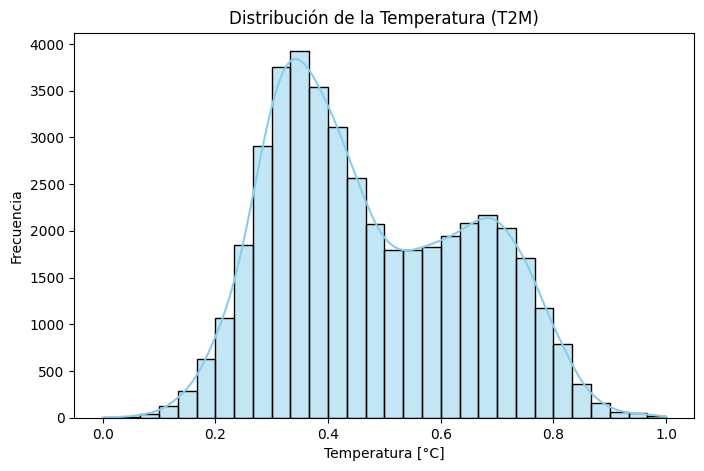

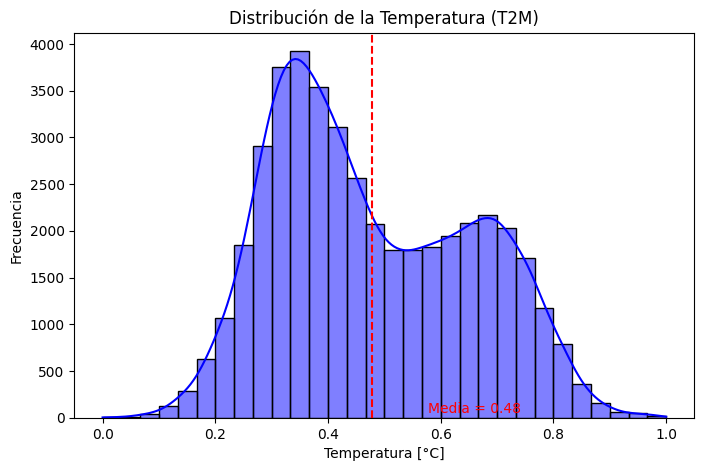

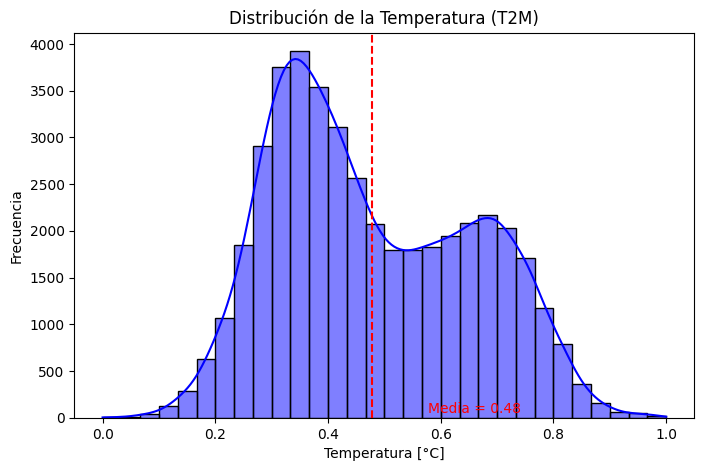

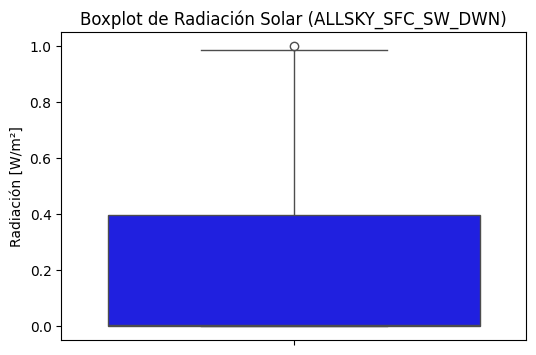

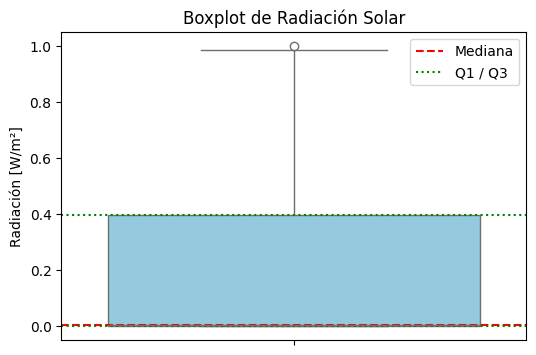

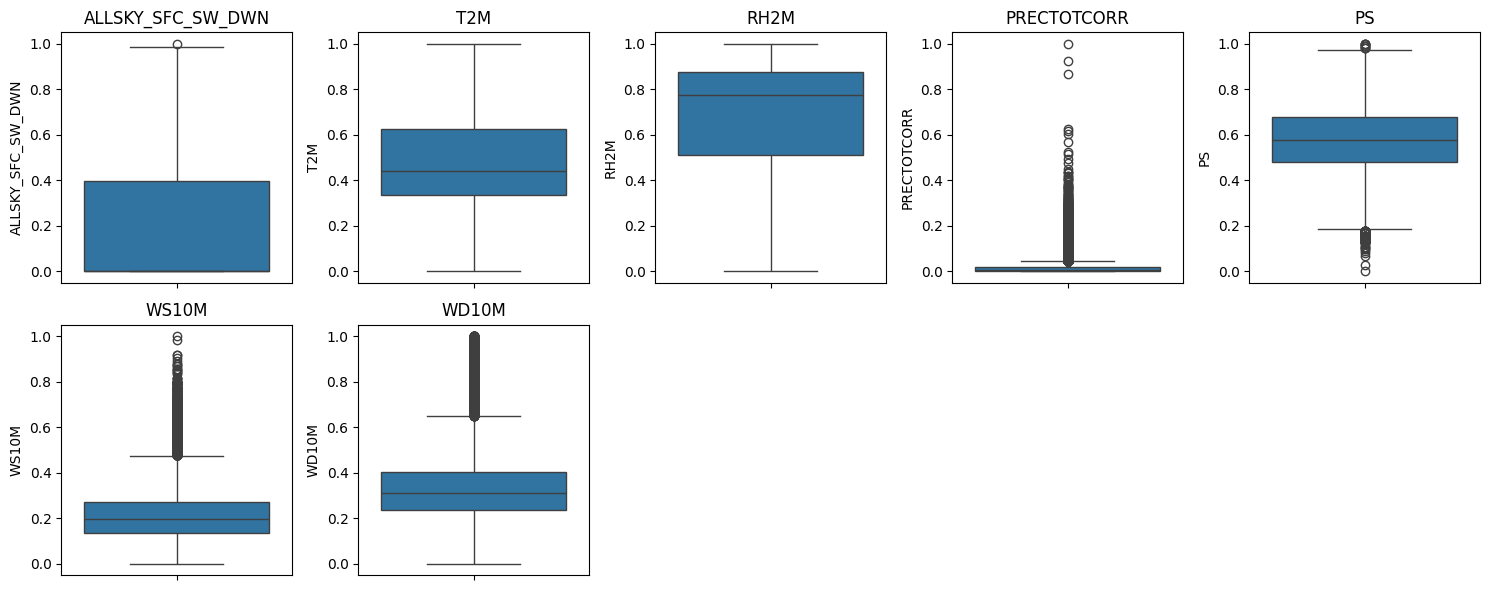

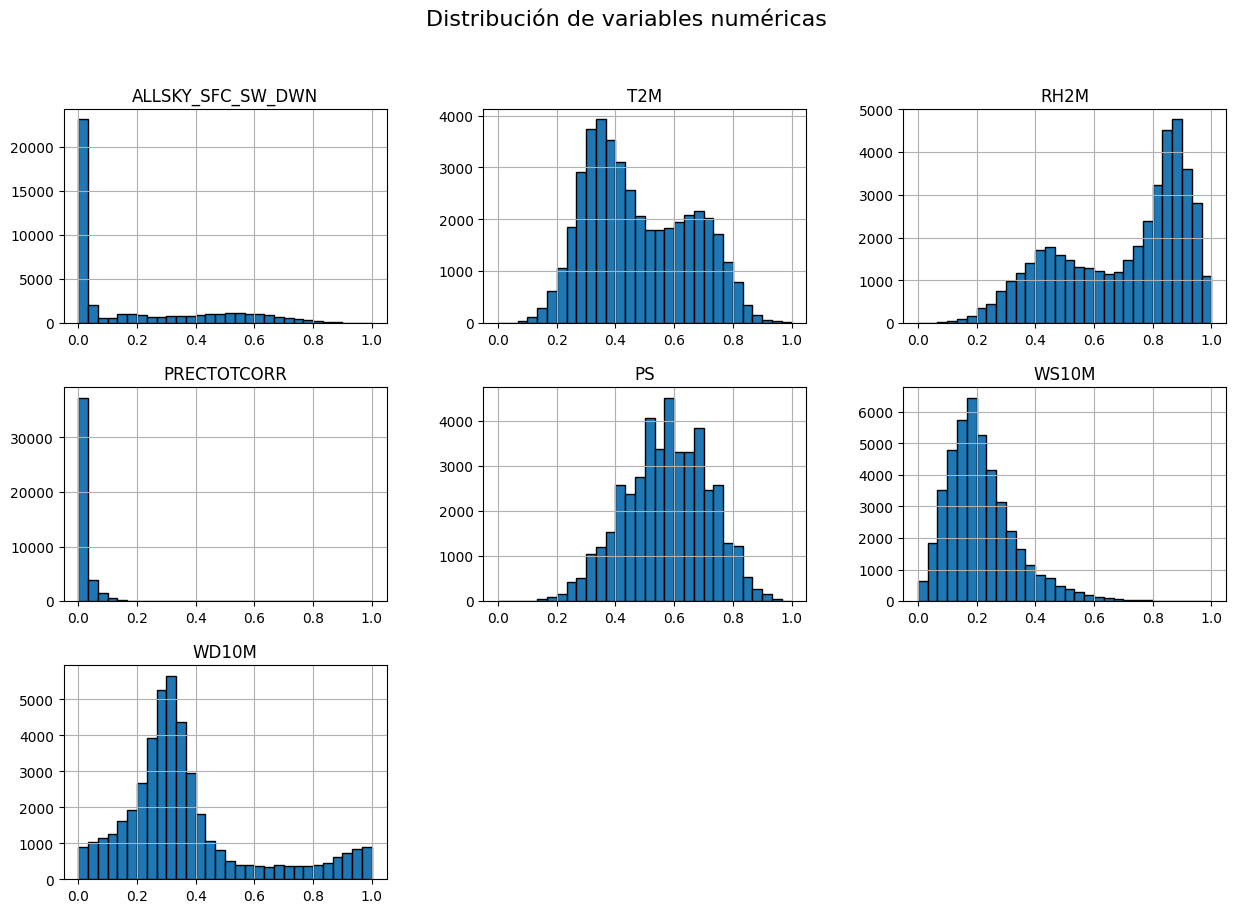

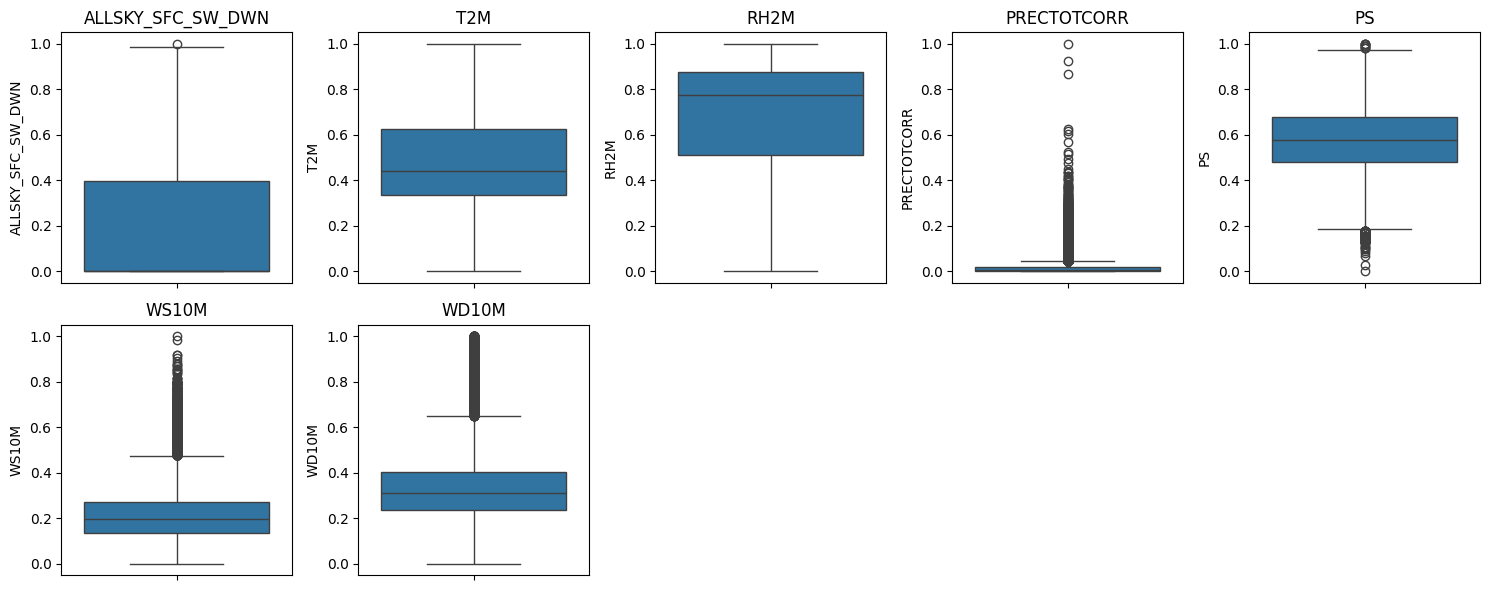

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_norm['T2M'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Temperatura (T2M)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_norm['T2M'], kde=True, bins=30, color='blue')

media = df_norm['T2M'].mean()
plt.axvline(media, color='red', linestyle='--')
plt.text(media+0.1, 50, f'Media = {media:.2f}', color='red')

plt.title('Distribución de la Temperatura (T2M)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_norm['T2M'], kde=True, bins=30, color='blue')

media = df_norm['T2M'].mean()
plt.axvline(media, color='red', linestyle='--')
plt.text(media+0.1, 50, f'Media = {media:.2f}', color='red')

plt.title('Distribución de la Temperatura (T2M)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=df_norm['ALLSKY_SFC_SW_DWN'], color='blue')
plt.title('Boxplot de Radiación Solar (ALLSKY_SFC_SW_DWN)')
plt.ylabel('Radiación [W/m²]')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=df_norm['ALLSKY_SFC_SW_DWN'], color='skyblue')

# Agregar líneas de Q1, Q3, mediana
q1 = df_norm['ALLSKY_SFC_SW_DWN'].quantile(0.25)
q3 = df_norm['ALLSKY_SFC_SW_DWN'].quantile(0.75)
med = df_norm['ALLSKY_SFC_SW_DWN'].median()

plt.axhline(med, color='red', linestyle='--', label='Mediana')
plt.axhline(q1, color='green', linestyle=':', label='Q1 / Q3')
plt.axhline(q3, color='green', linestyle=':')

plt.legend()
plt.title('Boxplot de Radiación Solar')
plt.ylabel('Radiación [W/m²]')
plt.show()

plt.figure(figsize=(15,6))
for i,col in enumerate(cols_a_evaluar):
    plt.subplot(2, (len(df_norm.columns))//2, i+1)
    sns.boxplot(y=df_norm[col])
    plt.title(col)
plt.tight_layout()
plt.show()

df_norm[cols_a_evaluar].hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

plt.figure(figsize=(15,6))
for i,col in enumerate(cols_a_evaluar):
    plt.subplot(2, (len(df_norm.columns))//2, i+1)
    sns.boxplot(y=df_norm[col])
    plt.title(col)
plt.tight_layout()
plt.show()



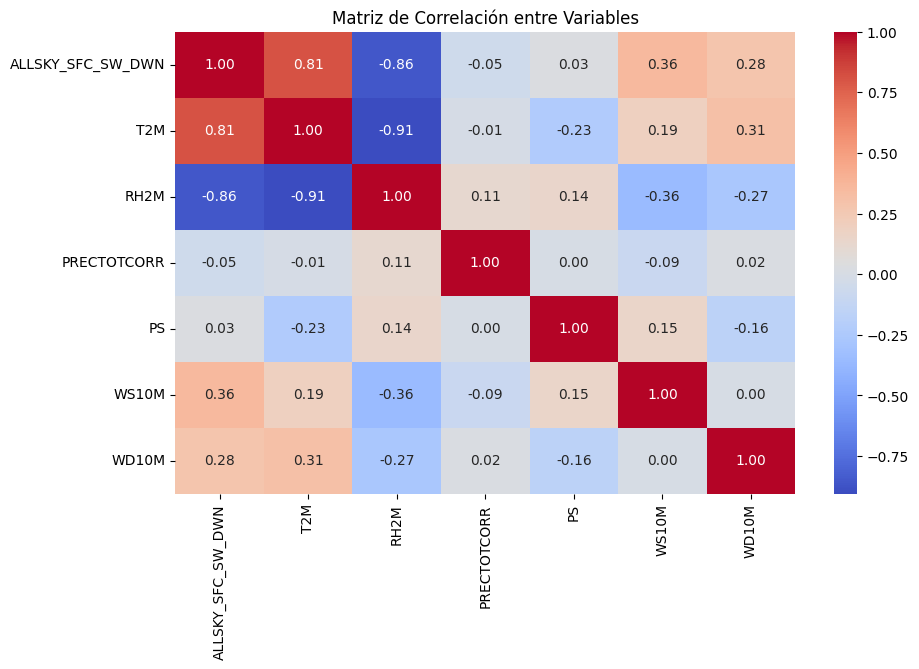

In [20]:
plt.figure(figsize=(10,6))
corr = df_norm[cols_a_evaluar].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

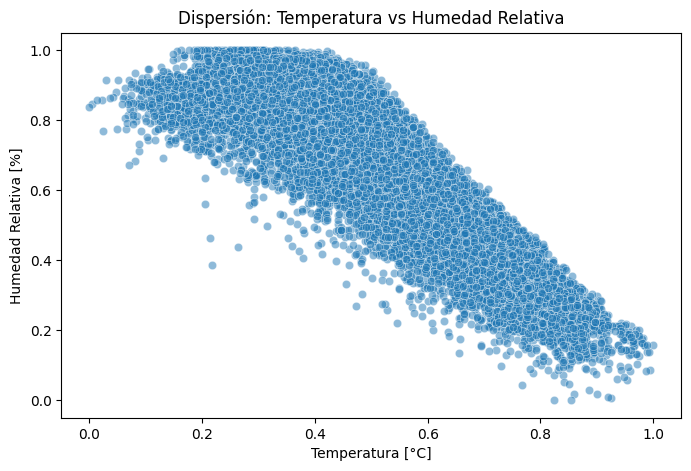

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='T2M', y='RH2M', data=df_norm, alpha=0.5)
plt.title('Dispersión: Temperatura vs Humedad Relativa')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Humedad Relativa [%]')
plt.show()


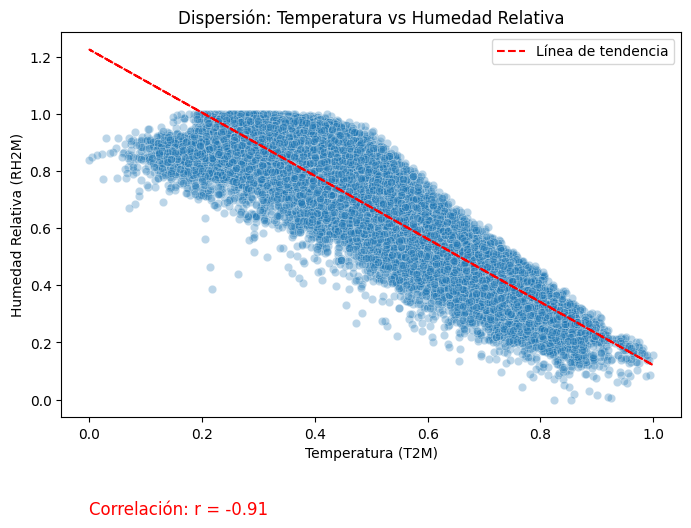

In [23]:
from scipy.stats import linregress

x = df_norm['T2M']
y = df_norm['RH2M']
r = x.corr(y)
slope, intercept, *_ = linregress(x, y)

plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, alpha=0.3)

# Línea de regresión
plt.plot(x, slope*x + intercept, color='red', linestyle='--', label='Línea de tendencia')

# Texto con r
plt.text(x.min(), y.max()-1.4, f'Correlación: r = {r:.2f}', fontsize=12, color='red')

plt.title('Dispersión: Temperatura vs Humedad Relativa')
plt.xlabel('Temperatura (T2M)')
plt.ylabel('Humedad Relativa (RH2M)')
plt.legend()
plt.show()

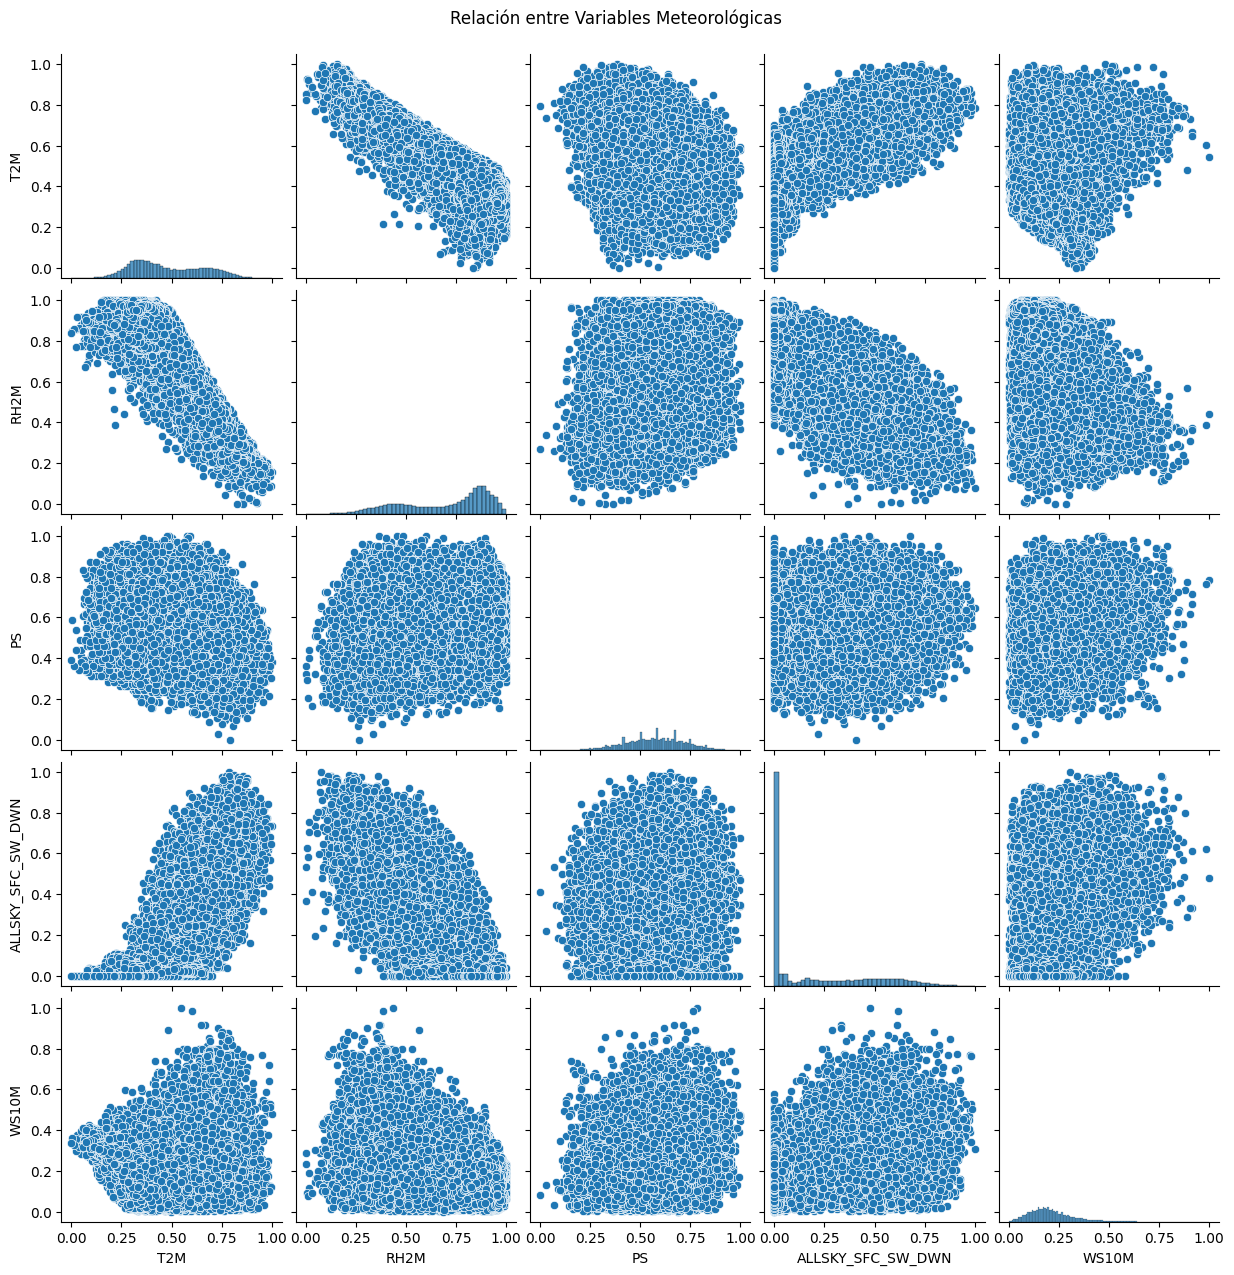

In [24]:
vars_plot = ['T2M', 'RH2M', 'PS', 'ALLSKY_SFC_SW_DWN', 'WS10M']
sns.pairplot(df_norm[vars_plot])
plt.suptitle('Relación entre Variables Meteorológicas', y=1.02)
plt.show()


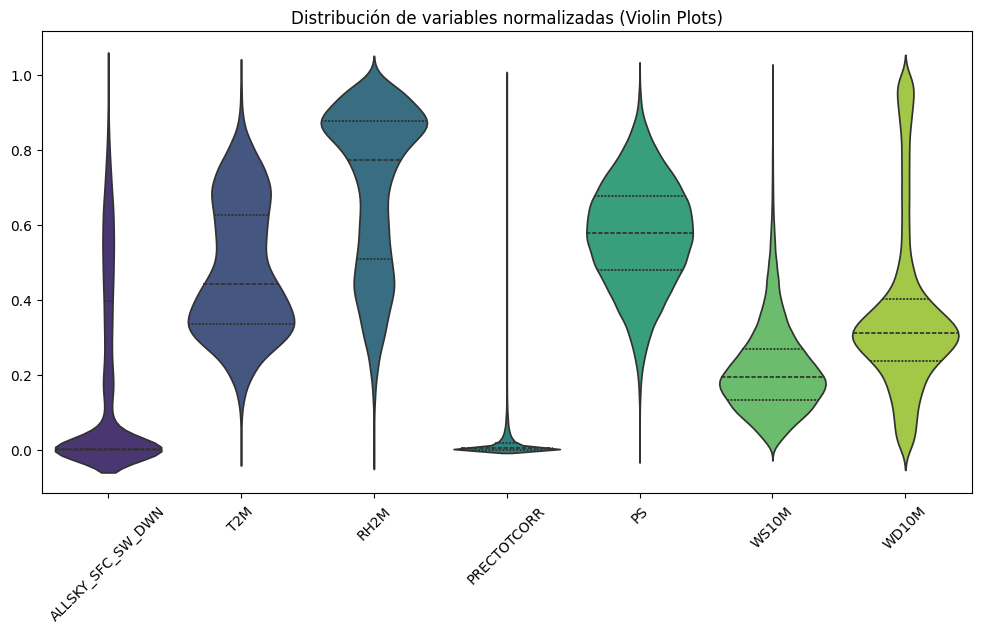

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_norm[cols_a_evaluar], inner="quartile", palette="viridis")
plt.title("Distribución de variables normalizadas (Violin Plots)")
plt.xticks(rotation=45)
plt.show()

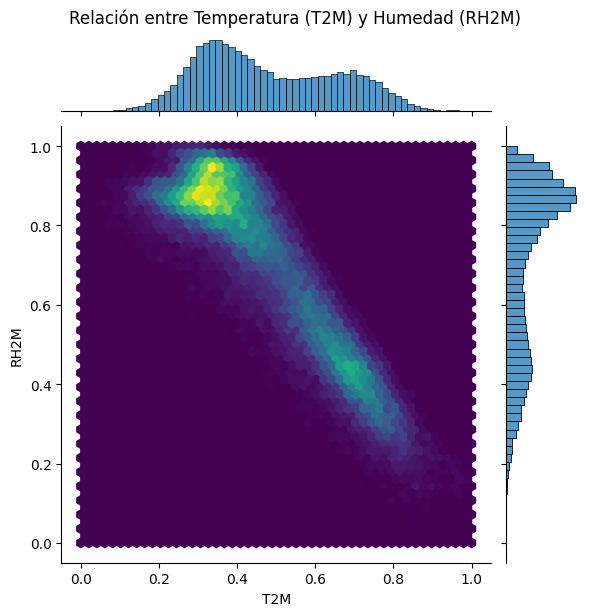

In [26]:
sns.jointplot(data=df_norm, x="T2M", y="RH2M", kind="hex", cmap="viridis")
plt.suptitle("Relación entre Temperatura (T2M) y Humedad (RH2M)", y=1.02)
plt.show()